# Final Project Part 2 - Exploratory Data Analysis

## 1. Import Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

%matplotlib inline

## 2. Load Data to DataFrame

In [2]:
flights = pd.read_csv('flights_sample2.csv')

## 3. Explornig the Dataset

## 3.1 Understanding the size, structure and schema of the dataset

In [3]:
# View no of rows and columns
flights.shape

(300000, 32)

A total of **300,000 records** & **32 attributes** where the first 12 are feature variables and the last 1 is the output

In [4]:
flights.head()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flights_fix = flights.loc[:, ~flights.columns.str.contains('^Unnamed')]

In [6]:
#All flights from 2015
flights_fix2 = flights_fix.drop('YEAR', axis='columns')

Dropped first column

In [7]:
flights_fix2.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#View row index
flights_fix2.index

RangeIndex(start=0, stop=300000, step=1)

In [9]:
# View a concise summary of data schema
flights_fix2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 30 columns):
MONTH                  300000 non-null int64
DAY                    300000 non-null int64
DAY_OF_WEEK            300000 non-null int64
AIRLINE                300000 non-null object
FLIGHT_NUMBER          300000 non-null int64
TAIL_NUMBER            299505 non-null object
ORIGIN_AIRPORT         300000 non-null object
DESTINATION_AIRPORT    300000 non-null object
SCHEDULED_DEPARTURE    300000 non-null int64
DEPARTURE_TIME         294561 non-null float64
DEPARTURE_DELAY        294561 non-null float64
TAXI_OUT               294390 non-null float64
WHEELS_OFF             294390 non-null float64
SCHEDULED_TIME         300000 non-null float64
ELAPSED_TIME           293634 non-null float64
AIR_TIME               293634 non-null float64
DISTANCE               300000 non-null int64
WHEELS_ON              294130 non-null float64
TAXI_IN                294130 non-null float64
SCHEDULED_AR

In [10]:
# View column names
flights_fix2.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [11]:
# View data types
flights_fix2.dtypes

MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

**month**, **day**, and **day_of_week** variables are categorical data type. Therefore they need to be transformed into dummies

## 3.2 Understanding the data

### 3.2.1 General summary of the dataset

In [12]:
flights_fix2.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
flights_fix2.tail()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
299995,1,20,2,WN,651,N7734H,PIT,ATL,1615,1625.0,...,1800.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
299996,1,20,2,AA,65,N3CSAA,JFK,DFW,1615,1610.0,...,1908.0,-23.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
299997,1,20,2,AA,165,N3LNAA,BOS,LAX,1615,1614.0,...,1929.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
299998,1,20,2,AA,103,N437AA,MSY,DFW,1615,1615.0,...,1758.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
299999,1,20,2,AA,379,N860AA,SFO,DFW,1615,1605.0,...,2109.0,-24.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# checking for null data
flights_fix2.isnull().sum()

MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER               495
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME           5439
DEPARTURE_DELAY          5439
TAXI_OUT                 5610
WHEELS_OFF               5610
SCHEDULED_TIME              0
ELAPSED_TIME             6366
AIR_TIME                 6366
DISTANCE                    0
WHEELS_ON                5870
TAXI_IN                  5870
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME             5870
ARRIVAL_DELAY            6366
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON    294314
AIR_SYSTEM_DELAY       227757
SECURITY_DELAY         227757
AIRLINE_DELAY          227757
LATE_AIRCRAFT_DELAY    227757
WEATHER_DELAY          227757
dtype: int64

**Null values** in the dataset. Will have to check if a model can be made without those features. May not need them if correlated with previous columns.

In [15]:
# View a concise summary of data for modelling - numeric variables
flights_fix2.describe()

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,300000.0,300000.000000,300000.000000,300000.000000,300000.000000,294561.000000,294561.000000,294390.000000,294390.000000,300000.000000,...,300000.00000,294130.000000,293634.000000,300000.000000,300000.000000,72243.000000,72243.000000,72243.000000,72243.000000,72243.000000
mean,1.0,10.231673,4.018087,2262.073127,1317.587673,1330.344482,12.781027,16.545423,1353.447260,140.715803,...,1500.20701,1485.028545,9.272046,0.002267,0.018953,13.323547,0.074831,18.095995,24.376535,2.981991
std,0.0,5.676179,2.035068,1807.573049,467.861041,482.124414,39.907027,9.580910,482.366163,75.066890,...,483.53649,508.657530,42.663364,0.047556,0.136360,25.660444,2.076642,44.828128,42.167754,19.630498
min,1.0,1.000000,1.000000,1.000000,5.000000,1.000000,-47.000000,1.000000,1.000000,23.000000,...,1.00000,1.000000,-76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,5.000000,2.000000,759.000000,920.000000,928.000000,-4.000000,11.000000,944.000000,85.000000,...,1120.00000,1113.000000,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,10.000000,4.000000,1727.000000,1315.000000,1325.000000,-1.000000,14.000000,1338.000000,122.000000,...,1520.00000,1516.000000,-2.000000,0.000000,0.000000,3.000000,0.000000,3.000000,7.000000,0.000000
75%,1.0,15.000000,6.000000,3479.000000,1714.000000,1727.000000,13.000000,19.000000,1740.000000,174.000000,...,1909.00000,1911.000000,14.000000,0.000000,0.000000,18.000000,0.000000,19.000000,32.000000,0.000000
max,1.0,20.000000,7.000000,9793.000000,2359.000000,2400.000000,1604.000000,176.000000,2400.000000,718.000000,...,2359.00000,2400.000000,1593.000000,1.000000,1.000000,824.000000,237.000000,1593.000000,938.000000,938.000000


In [16]:
# View a concise summary of data for modelling - non-numeric variables
flights_fix2.describe(include='object')

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
count,300000,299505,300000,300000,5686
unique,14,4333,312,312,4
top,WN,N484HA,ATL,ATL,A
freq,63691,248,18639,18763,2227


### 3.1.2 Analysing numerical variables

In [17]:
# Get the correlation of all variables
flights_fix2.corr()

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,1.000000,-0.141041,0.006262,-0.046471,-0.057886,-0.148231,-0.047449,-0.055323,-0.018976,...,-0.025612,-0.012427,-0.173359,-0.004996,-0.058412,-0.023747,0.005760,0.011100,-0.050412,-0.012410
DAY_OF_WEEK,NaN,-0.141041,1.000000,0.014021,0.035913,0.033267,0.019972,-0.027274,0.031366,0.018354,...,0.025360,0.014037,0.017307,0.001264,-0.001139,-0.025020,0.009866,0.015409,0.018929,-0.020101
FLIGHT_NUMBER,NaN,0.006262,0.014021,1.000000,-0.004045,0.004565,0.031826,0.058102,0.011018,-0.334110,...,-0.026855,-0.010026,0.058762,0.008740,0.076400,-0.010621,-0.010851,0.015781,0.065826,0.004227
SCHEDULED_DEPARTURE,NaN,-0.046471,0.035913,-0.004045,1.000000,0.965049,0.119215,-0.076161,0.939467,-0.031192,...,0.761099,0.649143,0.106060,-0.004185,0.004654,-0.094055,-0.009217,-0.073948,0.163005,-0.033370
DEPARTURE_TIME,NaN,-0.057886,0.033267,0.004565,0.965049,1.000000,0.200418,-0.066177,0.971833,-0.036127,...,0.760805,0.666239,0.184122,-0.001384,0.007606,-0.075123,-0.005112,-0.009594,0.233773,-0.025496
DEPARTURE_DELAY,NaN,-0.148231,0.019972,0.031826,0.119215,0.200418,1.000000,0.071719,0.190712,0.010487,...,0.109916,0.071306,0.946531,0.026314,0.029834,0.079940,0.012781,0.609095,0.576754,0.249834
TAXI_OUT,NaN,-0.047449,-0.027274,0.058102,-0.076161,-0.066177,0.071719,1.000000,-0.040226,0.094072,...,-0.056534,-0.046203,0.246704,0.010917,0.005728,0.383497,-0.008904,-0.044512,-0.128261,0.101550
WHEELS_OFF,NaN,-0.055323,0.031366,0.011018,0.939467,0.971833,0.190712,-0.040226,1.000000,-0.042650,...,0.770210,0.685921,0.179582,-0.001228,0.006683,-0.065596,-0.006434,-0.017961,0.210436,-0.032507
SCHEDULED_TIME,NaN,-0.018976,0.018354,-0.334110,-0.031192,-0.036127,0.010487,0.094072,-0.042650,1.000000,...,0.047990,0.029214,-0.044067,0.011929,-0.063089,0.022541,0.005450,0.032917,-0.064113,-0.011419


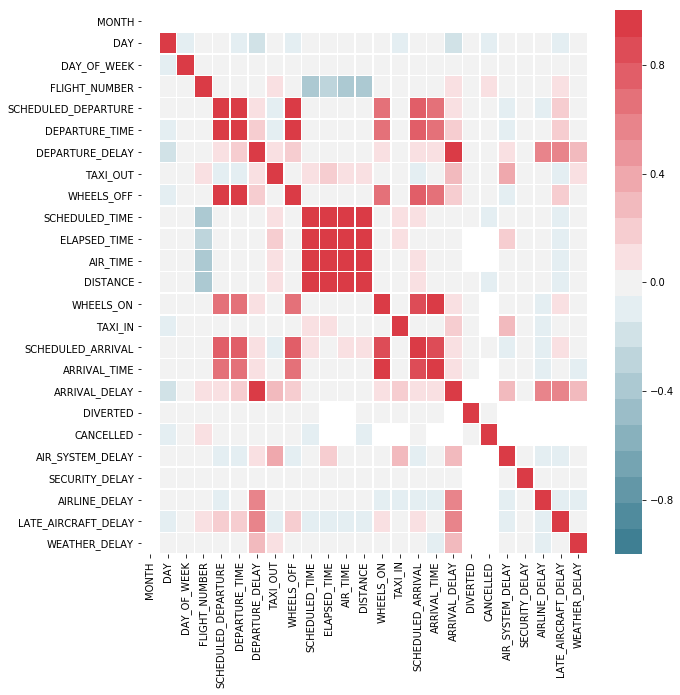

In [18]:
# Heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(flights_fix2.corr(),vmin=-1, vmax=1,cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), linewidths=.5, ax=ax);

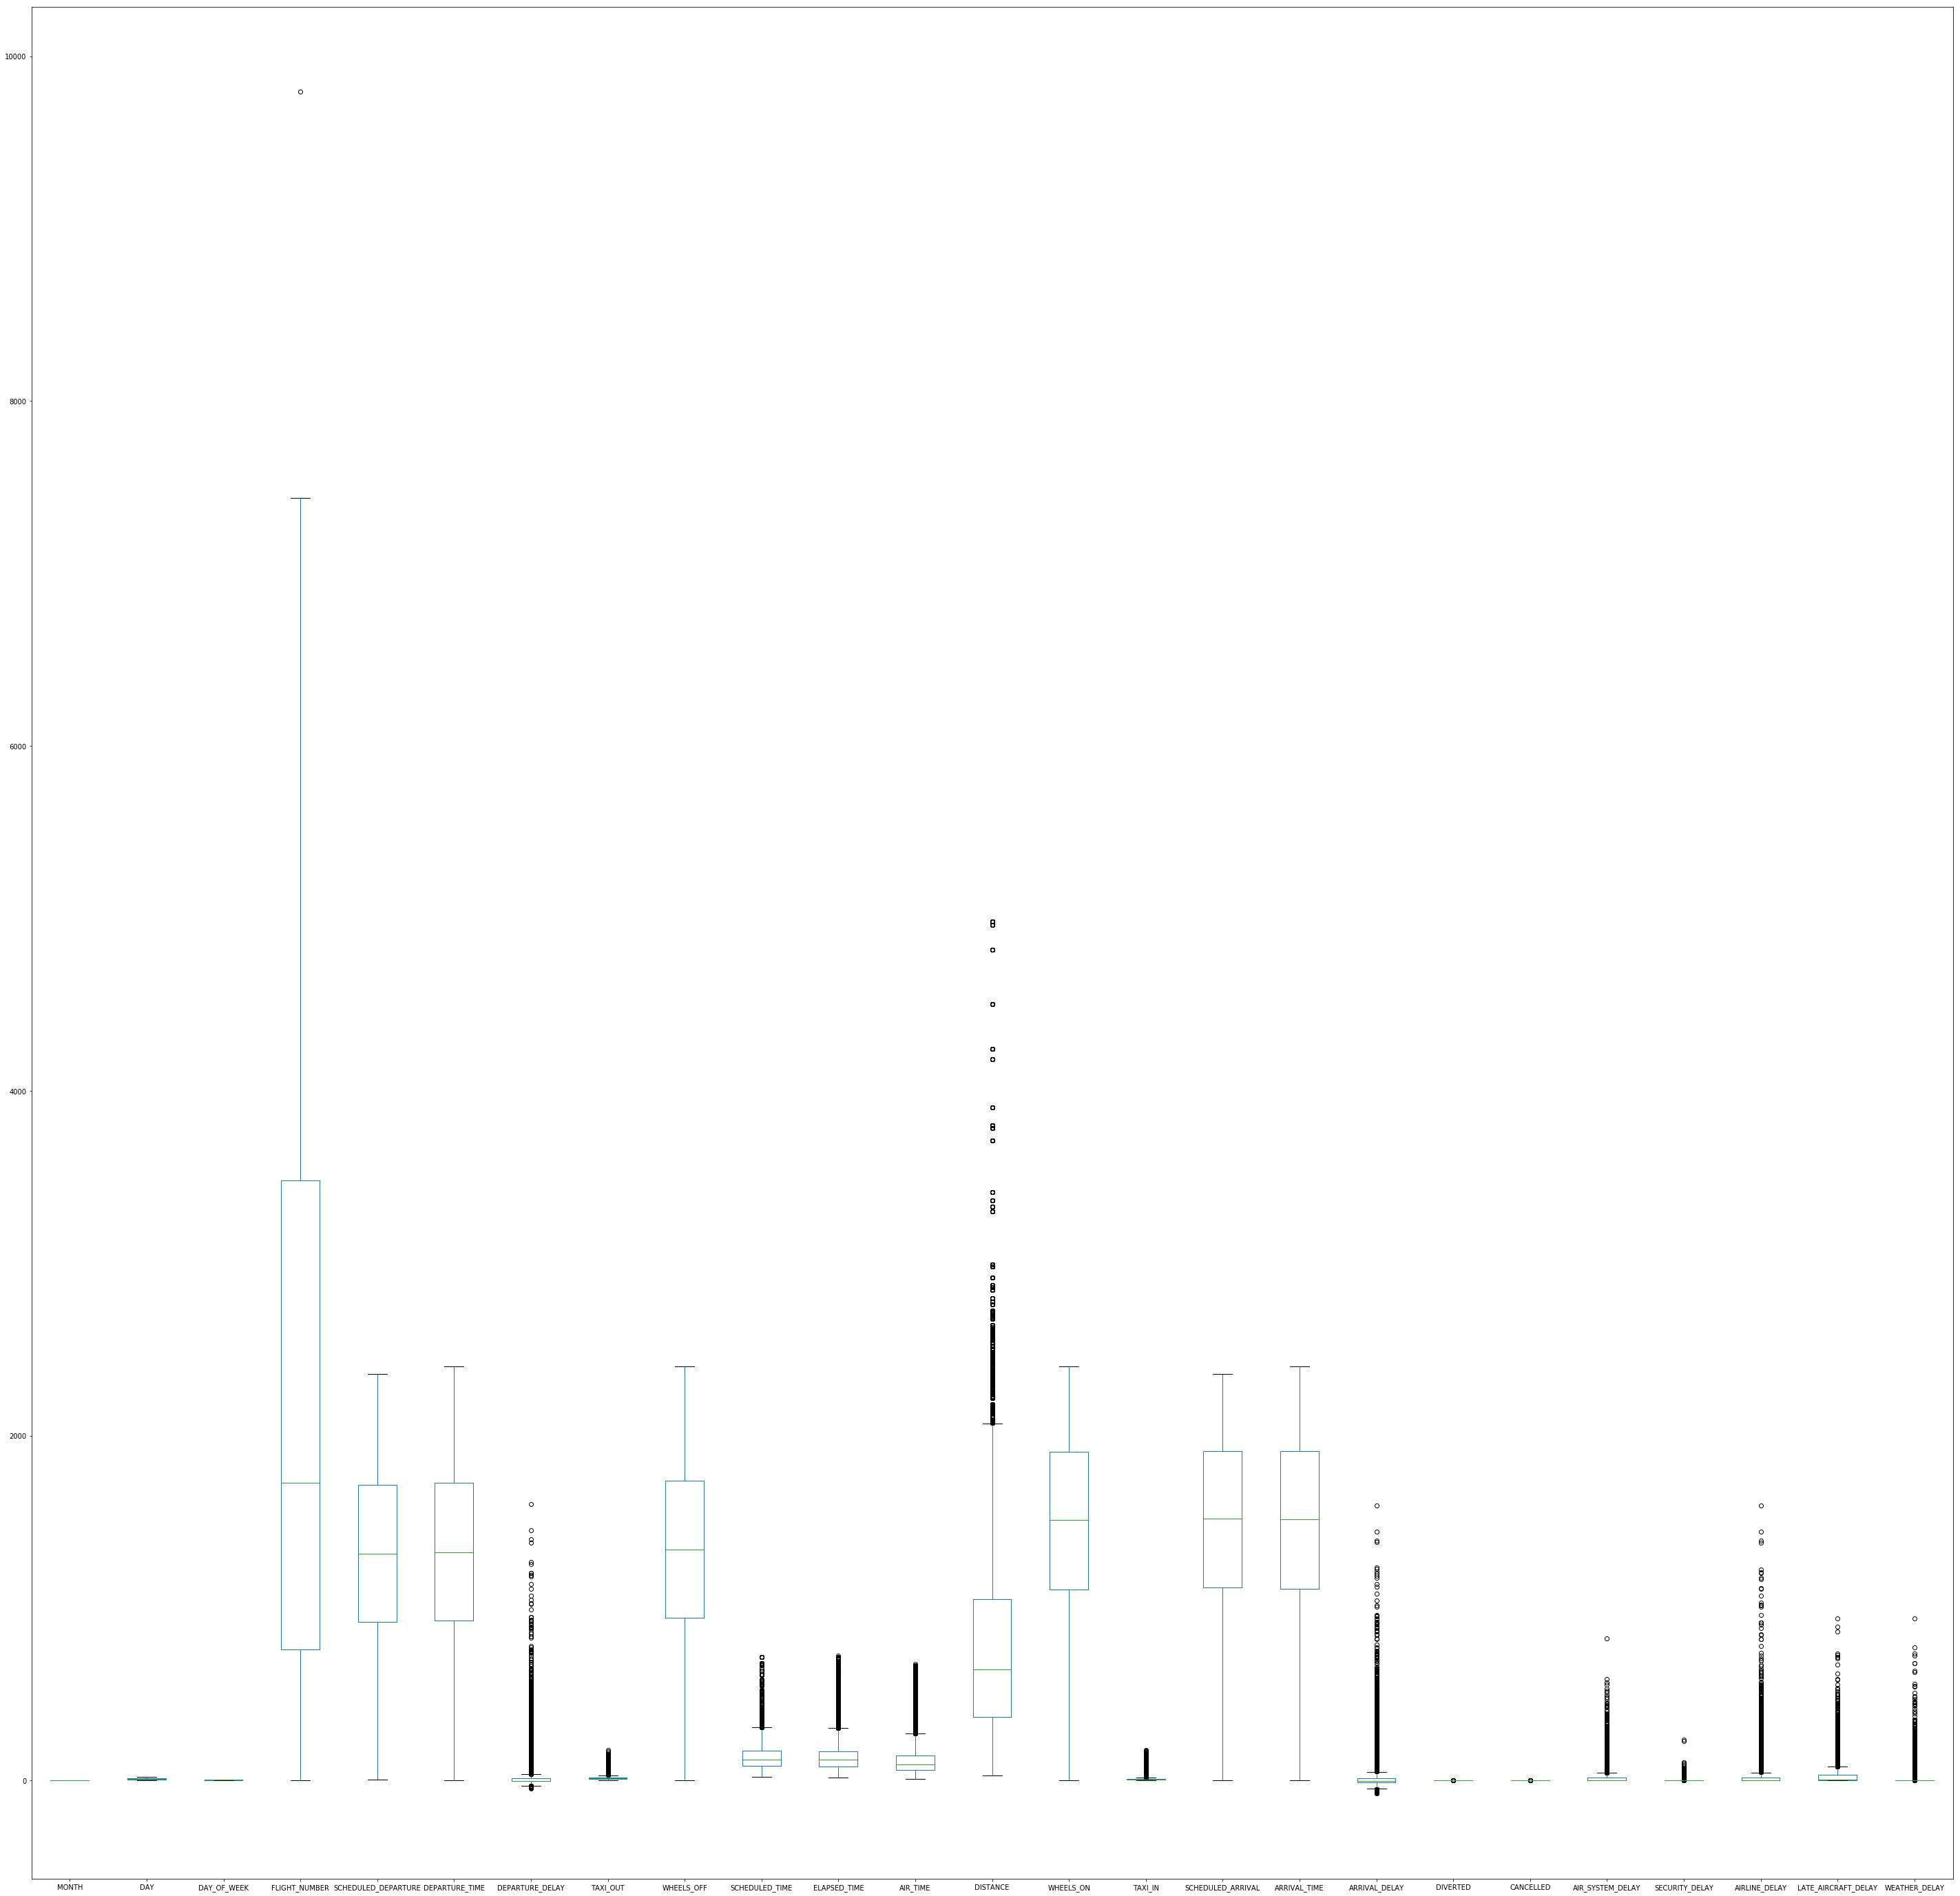

In [19]:
# check for outliers via a box plot
ax = flights_fix2.plot(kind='box',figsize=(50, 50))

Many outliers in multiple variables. May be necessary to separate and analyze since I care about delays which occur in outliers.

I will procede without removing outliers first.

In [20]:
# remove outliers in area variable
#flights_fix_excl_outliers = forest_fire.loc[forest_fire.loc[:,'area']<600,:]
#flights_fix_excl_outliers.shape

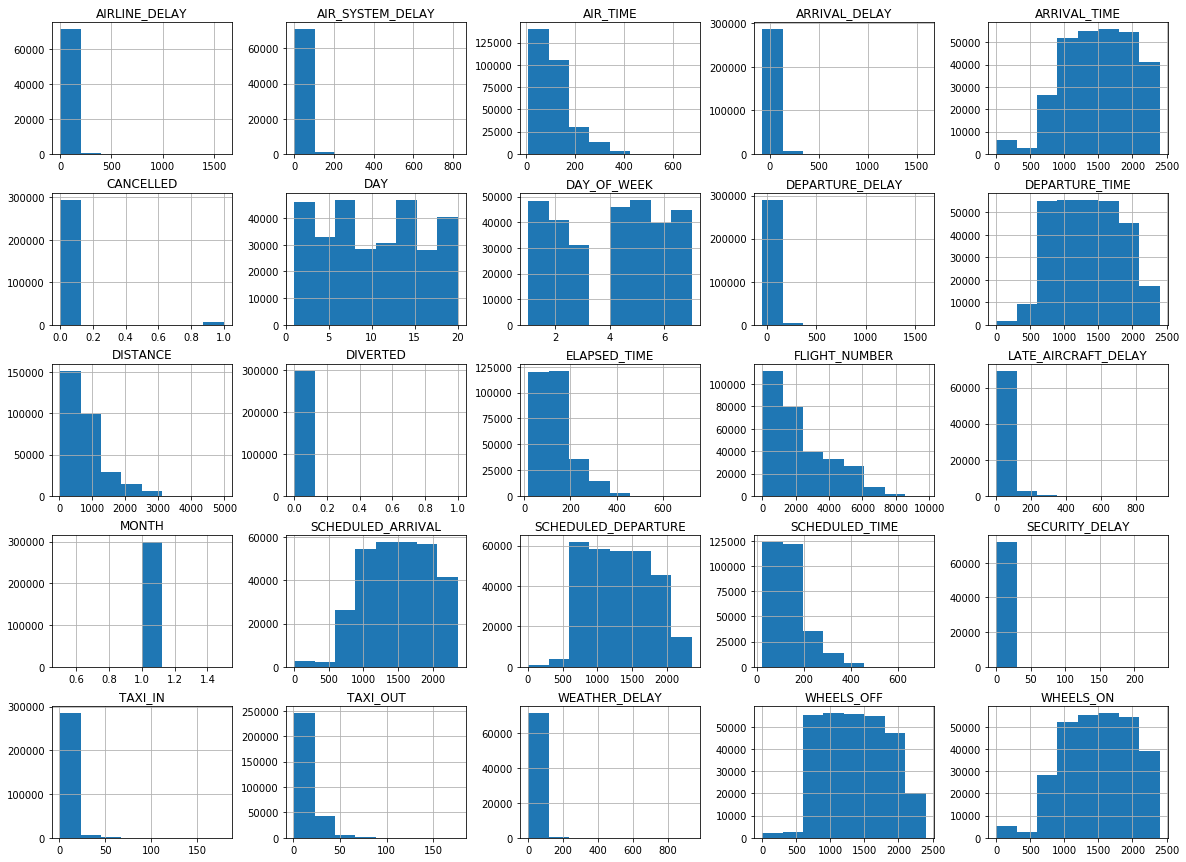

In [21]:
# Determining the distribution of the data 
axes = flights_fix2.hist(figsize=(20, 15),bins=8)

In [22]:
list_of_stats_list2 = list(flights_fix2.select_dtypes(['int64','float64']).columns.values)
print(list_of_stats_list2)

['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']


Want to drop some columns with too many NA's, but not all of those rows.




In [23]:
flights_fix3 = flights_fix2.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis='columns')

In [24]:
list_of_stats_list2 = list(flights_fix3.select_dtypes(['int64','float64']).columns.values)
print(list_of_stats_list2)

['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED']


Now can drop NA's that aren't too many columns

In [25]:
flights_fix4 = flights_fix3.dropna()


In [26]:
flights_fix4.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


In [27]:
var_list = list(flights_fix4.select_dtypes(['int64','float64']).columns.values)


In [28]:
# view measures of central tendency of the dataset 
list_of_stats_list = [['Variable','Mean','Median','Mode']]

for v in var_list:
    list_of_stats_list.append([v,flights_fix4.loc[:,v].mean(),flights_fix4.loc[:,v].median(),flights_fix4.loc[:,v].mode()[0]])

headers = list_of_stats_list.pop(0)
central_tendency = pd.DataFrame(list_of_stats_list, columns=headers)    

central_tendency

,Variable,Mean,Median,Mode
0,MONTH,1.000000,1.0,1.0
1,DAY,10.279242,10.0,2.0
2,DAY_OF_WEEK,4.018285,4.0,5.0
3,FLIGHT_NUMBER,2242.066198,1709.0,469.0
4,SCHEDULED_DEPARTURE,1317.379421,1315.0,600.0
5,DEPARTURE_TIME,1330.270122,1325.0,555.0
6,DEPARTURE_DELAY,12.695900,-1.0,-3.0
7,TAXI_OUT,16.539505,14.0,12.0
8,WHEELS_OFF,1353.423847,1338.0,709.0
9,SCHEDULED_TIME,141.332080,123.0,80.0


***Distance*** and ***Air_time*** are clearly skewed. Along with ***Elapsed_time***

In [29]:
# Scatter matrix of numerical columns
#axes = sns.pairplot(flights_fix4)

Our primary focus here is to understand the linear relationship between feature variables and the output variable 'area'.
As per the pairplot, its evident that variables FFMC,DC, ISI, temp, RH, wind and rain has a notable linear relationship to the area of forest fire

### 3.3.3 Analysing non-numerical variables

In [30]:
# freequency distribution by flight_number
#ax = flights_fix4.hist(column='MONTH', by='FLIGHT_NUMBER', sharex=True, sharey=True, figsize=(20, 12))

As per the data, there is **no clear indication of a specific set of days** where forest fires are more likely to occur 

In [31]:
# view caegory counts of month variable to decide on which category to drop when dummy coding
flights_fix4.loc[:,'MONTH'].value_counts()

1    293634
Name: MONTH, dtype: int64

Most normal value for month **'aug' will be dropped**  when dummy coding

In [32]:
# view caegory counts of day variable to decide on which category to drop when dummy coding
flights_fix4.loc[:,'DAY'].value_counts()

2     16456
5     16074
16    15991
15    15901
4     15887
19    15762
9     15504
12    15399
14    15320
7     15234
8     15113
3     15050
13    14957
6     14876
11    14339
18    13703
1     13464
10    12138
17    12028
20    10438
Name: DAY, dtype: int64

Most normal value for day **'sun' will be dropped**  when dummy coding

In [33]:
flights_fix4.loc[:,'DAY_OF_WEEK'].value_counts()

5    47951
1    47235
4    44478
7    43929
2    40271
6    39216
3    30554
Name: DAY_OF_WEEK, dtype: int64

In [34]:
flights.loc[:,'AIRLINE'].value_counts()

WN    63691
DL    40671
EV    32078
OO    30899
AA    28190
UA    24606
US    21317
MQ    19068
B6    13886
AS     8472
NK     5548
F9     4435
HA     4099
VX     3040
Name: AIRLINE, dtype: int64

The above, and others, will require dummy_coding

In [43]:
flights_lr = flights_fix4.select_dtypes(['int64', 'float64'])

In [44]:
X = flights_lr.drop('DEPARTURE_DELAY', axis='columns')
y = flights_lr.loc[:, 'DEPARTURE_DELAY']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
lr.score(X_test, y_test)

1.0

# 4. Summary

My dataset clearly needs resampling from the original large dataset. Instead of the sample I took, I need to recreate a dataset that grabs a ramdom sample with a limit of no mor than 300k rows, which I may reduce to 200k. 

Below is a bit of work done on the full dataset, then written in markdown to remove the dataset so I can commit to github with their data limits.

In [ ]:
f = pd.read_csv('flights.csv')

In [53]:
f.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
f.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [49]:
f.loc[:,'AIRLINE'].value_counts()

WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: AIRLINE, dtype: int64

In [50]:
f.loc[:,'MONTH'].value_counts()

7     520718
8     510536
3     504312
6     503897
5     496993
10    486165
4     485151
12    479230
1     469968
11    467972
9     464946
2     429191
Name: MONTH, dtype: int64

In [52]:
f.loc[:,'DAY_OF_WEEK'].value_counts()

4    872521
1    865543
5    862209
3    855897
2    844600
7    817764
6    700545
Name: DAY_OF_WEEK, dtype: int64

In [54]:
f.loc[:,'TAIL_NUMBER'].value_counts()

N480HA    3768
N488HA    3723
N484HA    3723
N493HA    3585
N478HA    3577
N483HA    3528
N486HA    3513
N491HA    3494
N489HA    3477
N477HA    3402
N492HA    3310
N487HA    3292
N475HA    3217
N485HA    3175
N479HA    3161
N490HA    3069
N481HA    3040
N476HA    2930
N523SW    2755
N528SW    2637
N520SW    2579
N869AS    2417
N866AS    2397
N522SW    2366
N515SW    2361
N863AS    2352
N526SW    2335
N464SW    2324
N868CA    2301
N601WN    2280
          ... 
N844MH       3
N7LFAA       3
N825MH       3
N199UA       3
N7LHAA       3
N128UA       3
N7LLAA       3
N7LJAA       3
N7LRAA       2
N7LTAA       2
N827MH       2
N7LUAA       2
N8676A       2
N825NW       2
N844MQ       2
N702DN       2
N843MH       2
N7LCAA       2
N171UA       2
N826MH       2
N664US       2
N7LAAA       2
N852NW       1
N121UA       1
N7LEAA       1
N180UA       1
N175UA       1
N840MH       1
N7LBAA       1
N860NW       1
Name: TAIL_NUMBER, Length: 4897, dtype: int64

## 5. Conclusion

 

Linear Regression with time series is the appropriate option. We want to see how much the other variables can tell us delays and in how much time. A lot more scrubbing and dataprep needs to be done. Dummy_coding clearly needed.